In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/music-compression/" ./

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API" -O data.zip && rm -rf /tmp/cookies.txt

--2019-11-14 03:52:21--  https://docs.google.com/uc?export=download&confirm=hkRM&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API
Resolving docs.google.com (docs.google.com)... 173.194.216.138, 173.194.216.102, 173.194.216.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/41eicmur3pa1af58pfu3kdofm0ueoks0/1573696800000/00405666016553047732/*/1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API?e=download [following]
--2019-11-14 03:52:21--  https://doc-0g-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/41eicmur3pa1af58pfu3kdofm0ueoks0/1573696800000/00405666016553047732/*/1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API?e=download
Resolving doc-0g-4s-docs.googleusercontent.com (doc-0g-4s-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-0g-4s-docs.googleuserconten

In [0]:
!unzip -qq data.zip -d /content/music-compression/data/sample/fma_small/

In [5]:
%cd music-compression

/content/music-compression


In [0]:
!rm 'data/sample/fma_small/data/train/108925.mp3'
!rm 'data/sample/fma_small/data/train/133297.mp3'
!rm 'data/sample/fma_small/data/train/098567.mp3'
!rm 'data/sample/fma_small/data/train/099134.mp3'

In [7]:
!pip install pydub

In [0]:
import torch
import numpy as np

from runner.train import Trainer

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [0]:
#!rm 'data/sample/fma_xs/train/099134.mp3'

In [0]:
#from utils.data_helper import stat_all_files
#stat_all_files('data/sample/fma_xs/')

In [0]:
cuda_flag = True

In [10]:
trainer = Trainer('data/sample/fma_small/data/',
                  '/content/gdrive/My Drive/Colab Notebooks/music-compression/model_checkpoints/cnn_autoencoder_type1_big', 
                  batch_size=200, 
                  load_from_disk=False, 
                  cuda=cuda_flag)

Processing failed for file: data/sample/fma_small/data/test/098565.mp3
Insufficient size of mp3 file 
Processing failed for file: data/sample/fma_small/data/test/098569.mp3
Insufficient size of mp3 file 


In [11]:
trainer.train(num_epochs=150)

Epoch:1, Loss:1.3354
Epoch:6, Loss:1.0079
Epoch:11, Loss:0.9616
Epoch:16, Loss:0.5708
Epoch:21, Loss:0.5171
Epoch:26, Loss:0.4815
Epoch:31, Loss:0.4796
Epoch:36, Loss:0.2965
Epoch:41, Loss:0.2785
Epoch:46, Loss:0.3062
Epoch:51, Loss:0.2167
Epoch:56, Loss:0.3732
Epoch:61, Loss:0.2785
Epoch:66, Loss:0.2843
Epoch:71, Loss:0.3764
Epoch:76, Loss:0.1912
Epoch:81, Loss:0.2326
Epoch:86, Loss:0.2356
Epoch:91, Loss:0.2307
Epoch:96, Loss:0.2522
Epoch:101, Loss:0.2593
Epoch:106, Loss:0.1842
Epoch:111, Loss:0.2285
Epoch:116, Loss:0.2101
Epoch:121, Loss:0.1722
Epoch:126, Loss:0.1548
Epoch:131, Loss:0.1445
Epoch:136, Loss:0.3496
Epoch:141, Loss:0.1801
Epoch:146, Loss:0.1218


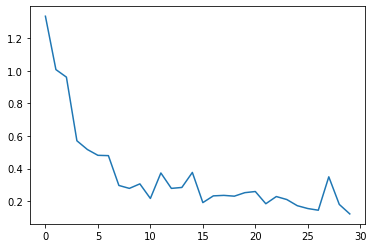

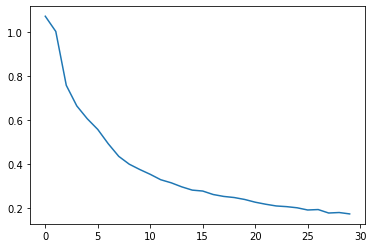

In [14]:
trainer.plot_loss_history(mode='train')
trainer.plot_loss_history(mode='test')